In [1]:
import requests
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [ ]:
###############################################################################################################################
#                                                            BTC                                                              #
###############################################################################################################################

In [2]:

# testing coin api
url = 'https://rest.coinapi.io/v1/ohlcv/BITSTAMP_SPOT_BTC_USD/history?period_id=1DAY&time_start=2022-10-05T00:00:00&limit=1'

headers = {
#   'Accepts': 'application/json',
  'X-CoinAPI-Key': 'AE75B183-3C7D-4DD5-81D6-67CD8386395F'
}

response = requests.get(url, headers=headers)

In [3]:
print(response)

<Response [200]>


In [4]:
# print response as json
data = json.loads(response.text)
print(data)

[{'time_period_start': '2022-10-05T00:00:00.0000000Z', 'time_period_end': '2022-10-06T00:00:00.0000000Z', 'time_open': '2022-10-05T00:00:04.4820000Z', 'time_close': '2022-10-05T23:59:56.4130000Z', 'price_open': 20343.0, 'price_high': 20366.0, 'price_low': 19735.0, 'price_close': 20162.0, 'volume_traded': 1784.30926355, 'trades_count': 12663}]


In [5]:
# converting json response to dataframe
df_json = response.json()
df_btc_price = pd.DataFrame.from_dict(df_json)
df_btc_price

,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count
0,2022-10-05T00:00:00.0000000Z,2022-10-06T00:00:00.0000000Z,2022-10-05T00:00:04.4820000Z,2022-10-05T23:59:56.4130000Z,20343.0,20366.0,19735.0,20162.0,1784.309264,12663


In [6]:
# checking data model manipulations
actual_price_btc_20221005 = df_btc_price['price_close'].values[0]

In [7]:
# reading cvs to get data for post processing

btc_predictions = pd.read_csv('C:/Users/Hamza/PycharmProjects/dissertation_project/stage_3/predictions/btc_7_day_model_prediction.csv')

In [8]:
# printing cvs as dataframe

btc_predictions

,date,predicted_price_close
0,2022-10-05,19461.552867
1,2022-10-06,19439.160262
2,2022-10-07,19450.406960
3,2022-10-08,19110.117832
4,2022-10-09,18972.622235
5,2022-10-10,19591.748519
6,2022-10-11,20328.575473


In [9]:
# static dates to use and empty list to capture actual prices

dates = ['2022-10-05', '2022-10-06', '2022-10-07', '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11']
actual_prices = []


In [10]:
actual_price_btc_20221005

20162.0

In [11]:
new_list = []

In [12]:
for date in dates:
  url = f'https://rest.coinapi.io/v1/ohlcv/BITSTAMP_SPOT_BTC_USD/history?period_id=1DAY&time_start={date}T00:00:00&limit=1'
  response = requests.get(url, headers=headers)
  data = json.loads(response.text)
  print(f'for {date} this is the value returned')
  print("\n")
  print(data)
  print("\n")

  df_json = response.json()
  df = pd.DataFrame.from_dict(df_json)

  actual_price_btc = df['price_close'].values[0]

  new_list.append(actual_price_btc)



for 2022-10-05 this is the value returned


[{'time_period_start': '2022-10-05T00:00:00.0000000Z', 'time_period_end': '2022-10-06T00:00:00.0000000Z', 'time_open': '2022-10-05T00:00:04.4820000Z', 'time_close': '2022-10-05T23:59:56.4130000Z', 'price_open': 20343.0, 'price_high': 20366.0, 'price_low': 19735.0, 'price_close': 20162.0, 'volume_traded': 1784.30926355, 'trades_count': 12663}]


for 2022-10-06 this is the value returned


[{'time_period_start': '2022-10-06T00:00:00.0000000Z', 'time_period_end': '2022-10-07T00:00:00.0000000Z', 'time_open': '2022-10-06T00:00:15.0650000Z', 'time_close': '2022-10-06T23:58:16.7800000Z', 'price_open': 20161.0, 'price_high': 20447.0, 'price_low': 19864.0, 'price_close': 19951.0, 'volume_traded': 1436.7279218, 'trades_count': 11755}]


for 2022-10-07 this is the value returned


[{'time_period_start': '2022-10-07T00:00:00.0000000Z', 'time_period_end': '2022-10-08T00:00:00.0000000Z', 'time_open': '2022-10-07T00:00:00.8450000Z', 'time_close': '2022-10-0

In [13]:
new_list

[20162.0, 19951.0, 19532.0, 19420.0, 19445.0, 19131.0, 19059.0]

In [14]:
btc_predictions

,date,predicted_price_close
0,2022-10-05,19461.552867
1,2022-10-06,19439.160262
2,2022-10-07,19450.406960
3,2022-10-08,19110.117832
4,2022-10-09,18972.622235
5,2022-10-10,19591.748519
6,2022-10-11,20328.575473


In [15]:
btc_predictions['actual_price_close'] = new_list

In [16]:
btc_predictions

,date,predicted_price_close,actual_price_close
0,2022-10-05,19461.552867,20162.0
1,2022-10-06,19439.160262,19951.0
2,2022-10-07,19450.406960,19532.0
3,2022-10-08,19110.117832,19420.0
4,2022-10-09,18972.622235,19445.0
5,2022-10-10,19591.748519,19131.0
6,2022-10-11,20328.575473,19059.0


In [17]:
btc_predictions.to_csv(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/btc/btc_7_day_actual.csv', encoding='utf-8', index=False)


In [18]:
estimated_value = btc_predictions['predicted_price_close'].values[0]

actual_value = btc_predictions['actual_price_close'].values[0]


In [19]:
print(f'estimated value is {estimated_value} and actual value is {actual_value}')

estimated value is 19461.55286700554 and actual value is 20162.0


In [20]:
percent_error = ((estimated_value - actual_value) / actual_value) * 100

In [21]:
percent_error

-3.4740954914912257

In [22]:
count = len(btc_predictions)

In [23]:
count

7

In [24]:
percent_error_list = []

In [25]:
for i in range(0, count):
  print("")
  date = btc_predictions['date'].values[i]
  estimated_value = btc_predictions['predicted_price_close'].values[i]
  actual_value = btc_predictions['actual_price_close'].values[i]
  print("")
  print(f'for {date} the estimated value is {estimated_value} and actual value is {actual_value}')
  print("")
  percent_error = ((estimated_value - actual_value) / actual_value) * 100
  print(f'error between predicted and actual is {percent_error}%')
  percent_error_list.append(percent_error)




for 2022-10-05 the estimated value is 19461.55286700554 and actual value is 20162.0

error between predicted and actual is -3.4740954914912257%


for 2022-10-06 the estimated value is 19439.160261560977 and actual value is 19951.0

error between predicted and actual is -2.565484128309472%


for 2022-10-07 the estimated value is 19450.40696025535 and actual value is 19532.0

error between predicted and actual is -0.41774032226423313%


for 2022-10-08 the estimated value is 19110.117832471205 and actual value is 19420.0

error between predicted and actual is -1.59568572362922%


for 2022-10-09 the estimated value is 18972.622235011957 and actual value is 19445.0

error between predicted and actual is -2.429301954168388%


for 2022-10-10 the estimated value is 19591.748518858592 and actual value is 19131.0

error between predicted and actual is 2.408387009871896%


for 2022-10-11 the estimated value is 20328.575473463174 and actual value is 19059.0

error between predicted and actual is

In [26]:
percent_error_list

[-3.4740954914912257,
 -2.565484128309472,
 -0.41774032226423313,
 -1.59568572362922,
 -2.429301954168388,
 2.408387009871896,
 6.661291114240902]

In [27]:
btc_predictions['percent_error'] = percent_error_list


In [28]:
btc_predictions

,date,predicted_price_close,actual_price_close,percent_error
0,2022-10-05,19461.552867,20162.0,-3.474095
1,2022-10-06,19439.160262,19951.0,-2.565484
2,2022-10-07,19450.406960,19532.0,-0.417740
3,2022-10-08,19110.117832,19420.0,-1.595686
4,2022-10-09,18972.622235,19445.0,-2.429302
5,2022-10-10,19591.748519,19131.0,2.408387
6,2022-10-11,20328.575473,19059.0,6.661291


In [29]:
btc_predictions.to_csv(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/btc/btc_percent_error.csv', encoding='utf-8', index=False)


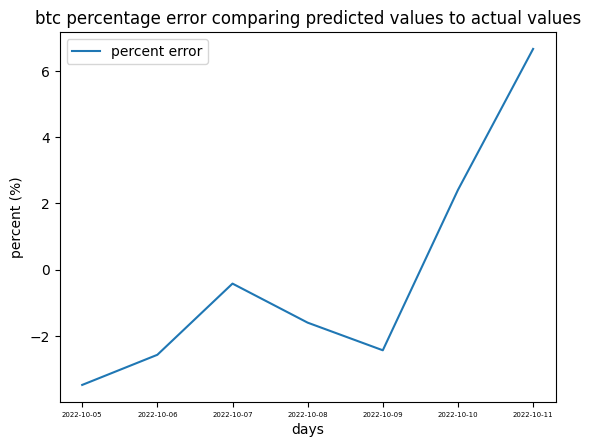

In [30]:
plt.plot(dates, percent_error_list, color = "red", label = "percent error")
plt.legend()
plt.title(f"btc percentage error comparing predicted values to actual values")
plt.xticks(fontsize=5)
plt.xlabel('days')
plt.ylabel('percent (%)')
plt.savefig(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/btc/percent_error_line.png')
plt.show()

In [31]:
prediction_list = btc_predictions['predicted_price_close'].values

In [32]:
prediction_list

array([19461.55286701, 19439.16026156, 19450.40696026, 19110.11783247,
       18972.62223501, 19591.74851886, 20328.57547346])

In [33]:
actual_list = btc_predictions['actual_price_close'].values


In [34]:
actual_list

array([20162., 19951., 19532., 19420., 19445., 19131., 19059.])

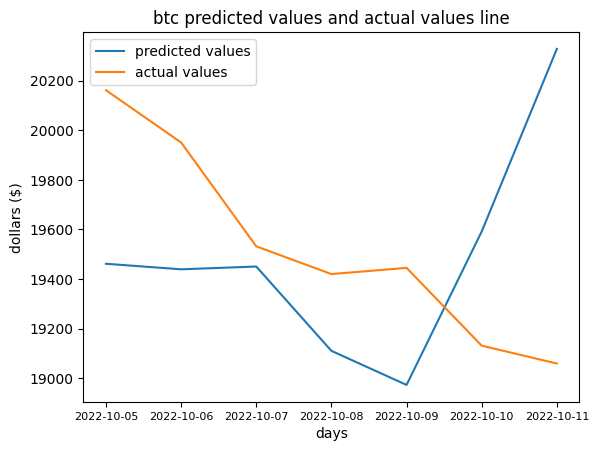

In [35]:

plt.plot(dates, prediction_list, label = "predicted values")
plt.plot(dates, actual_list, label = "actual values")

plt.legend()
plt.title(f"btc predicted values and actual values line")
plt.xticks(fontsize=8)
plt.xlabel('days')
plt.ylabel('dollars ($)')
plt.savefig(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/btc/predicted_vs_actual.png')
plt.show()


In [36]:
################################################################################################################################
#                                                      GLMR                                                                    #
################################################################################################################################

In [37]:
glmr_predictions = pd.read_csv('C:/Users/Hamza/PycharmProjects/dissertation_project/stage_3/predictions/glmr_7_day_model_prediction.csv')


In [38]:
glmr_predictions

,date,predicted_price_close
0,2022-10-05,0.694373
1,2022-10-06,0.674802
2,2022-10-07,0.683184
3,2022-10-08,0.670792
4,2022-10-09,0.665012
5,2022-10-10,0.688460
6,2022-10-11,0.684839


In [39]:
new_glmr_list = []
new_percent_error_list = []

In [40]:
for date in dates:
  url = f'https://rest.coinapi.io/v1/ohlcv/KRAKEN_SPOT_GLMR_USD/history?period_id=1DAY&time_start={date}T00:00:00&limit=1'
  response = requests.get(url, headers=headers)
  data = json.loads(response.text)
  print(f'for {date} this is the value returned')
  print("\n")
  print(data)
  print("\n")

  df_json = response.json()
  df = pd.DataFrame.from_dict(df_json)

  actual_price_glmr = df['price_close'].values[0]

  new_glmr_list.append(actual_price_glmr)

glmr_predictions['actual_price_close'] = new_glmr_list

glmr_predictions.to_csv(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/glmr/glmr_7_day_actual.csv', encoding='utf-8', index=False)

new_count = len(glmr_predictions)


for i in range(0, new_count):
  print("")
  date = glmr_predictions['date'].values[i]
  estimated_value = glmr_predictions['predicted_price_close'].values[i]
  actual_value = glmr_predictions['actual_price_close'].values[i]
  print("")
  print(f'for {date} the estimated value is {estimated_value} and actual value is {actual_value}')
  print("")
  percent_error = ((estimated_value - actual_value) / actual_value) * 100
  print(f'error between predicted and actual is {percent_error}%')
  new_percent_error_list.append(percent_error)

glmr_predictions['percent_error'] = new_percent_error_list

glmr_predictions.to_csv(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/glmr/glmr_percent_error.csv', encoding='utf-8', index=False)



for 2022-10-05 this is the value returned


[{'time_period_start': '2022-10-05T00:00:00.0000000Z', 'time_period_end': '2022-10-06T00:00:00.0000000Z', 'time_open': '2022-10-05T00:05:12.1830000Z', 'time_close': '2022-10-05T23:49:09.8500000Z', 'price_open': 0.472, 'price_high': 0.472, 'price_low': 0.454, 'price_close': 0.467, 'volume_traded': 84736.80545423, 'trades_count': 138}]


for 2022-10-06 this is the value returned


[{'time_period_start': '2022-10-06T00:00:00.0000000Z', 'time_period_end': '2022-10-07T00:00:00.0000000Z', 'time_open': '2022-10-06T00:08:15.2650000Z', 'time_close': '2022-10-06T23:52:20.0990000Z', 'price_open': 0.47, 'price_high': 0.537, 'price_low': 0.469, 'price_close': 0.482, 'volume_traded': 332120.37241032, 'trades_count': 469}]


for 2022-10-07 this is the value returned


[{'time_period_start': '2022-10-07T00:00:00.0000000Z', 'time_period_end': '2022-10-08T00:00:00.0000000Z', 'time_open': '2022-10-07T00:07:16.7390000Z', 'time_close': '2022-10-07T23:51:37.574000

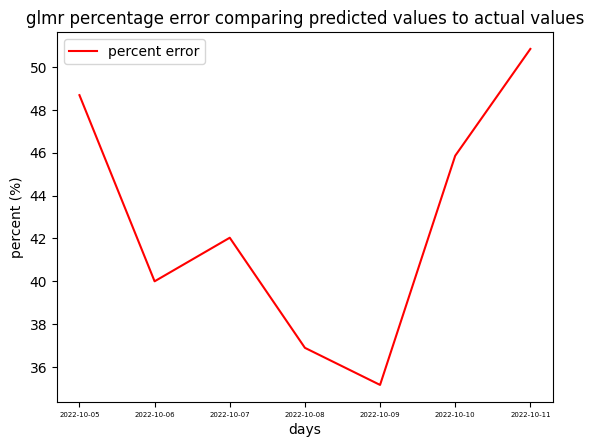

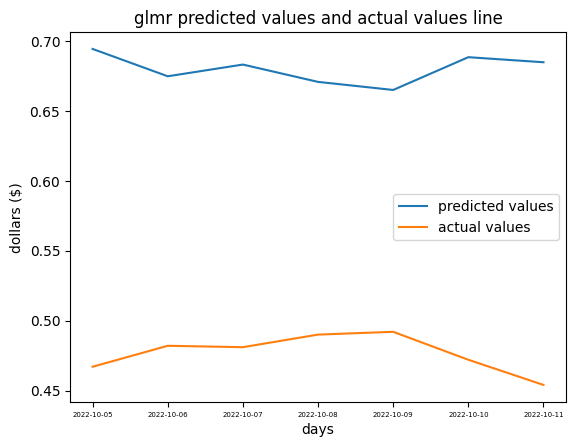

In [47]:
plt.plot(dates, new_percent_error_list, color = "red" ,label = "percent error")
plt.legend()
plt.title("glmr percentage error comparing predicted values to actual values")
plt.xticks(fontsize=5)
plt.xlabel('days')
plt.ylabel('percent (%)')
plt.savefig(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/glmr/percent_error_line.png')
plt.show()

new_prediction_list = glmr_predictions['predicted_price_close'].values
new_actual_list = glmr_predictions['actual_price_close'].values

plt.plot(dates, new_prediction_list, label = "predicted values")
plt.plot(dates, new_actual_list, label = "actual values")

plt.legend()
plt.title(f"glmr predicted values and actual values line")
plt.xticks(fontsize=5)
plt.xlabel('days')
plt.ylabel('dollars ($)')
plt.savefig(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/glmr/predicted_vs_actual.png')
plt.show()


In [37]:
###############################################################################################################################
#                                                            ETH                                                              #
###############################################################################################################################

In [51]:

# api key refresh
headers = {
#   'Accepts': 'application/json',
#   'X-CoinAPI-Key': 'AE75B183-3C7D-4DD5-81D6-67CD8386395F'
  'X-CoinAPI-Key': 'B6A54D76-BCD6-45AE-9F5E-E87536D4255C'

}

response = requests.get(url, headers=headers)

for 2022-10-05 this is the value returned


[{'time_period_start': '2022-10-05T00:00:00.0000000Z', 'time_period_end': '2022-10-06T00:00:00.0000000Z', 'time_open': '2022-10-05T00:00:07.7780000Z', 'time_close': '2022-10-05T23:59:41.1770000Z', 'price_open': 1361.8, 'price_high': 1364.8, 'price_low': 1317.3, 'price_close': 1352.4, 'volume_traded': 15525.452945, 'trades_count': 6707}]


for 2022-10-06 this is the value returned


[{'time_period_start': '2022-10-06T00:00:00.0000000Z', 'time_period_end': '2022-10-07T00:00:00.0000000Z', 'time_open': '2022-10-06T00:00:11.8500000Z', 'time_close': '2022-10-06T23:59:04.5660000Z', 'price_open': 1352.5, 'price_high': 1383.7, 'price_low': 1344.9, 'price_close': 1352.5, 'volume_traded': 15476.19386382, 'trades_count': 9080}]


for 2022-10-07 this is the value returned


[{'time_period_start': '2022-10-07T00:00:00.0000000Z', 'time_period_end': '2022-10-08T00:00:00.0000000Z', 'time_open': '2022-10-07T00:00:08.1310000Z', 'time_close': '2022-10-07T23:59:0

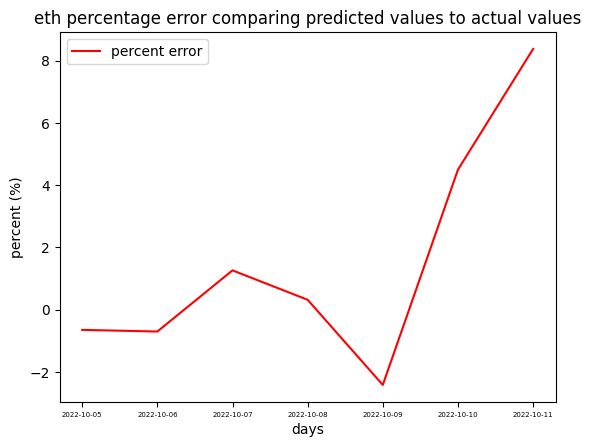

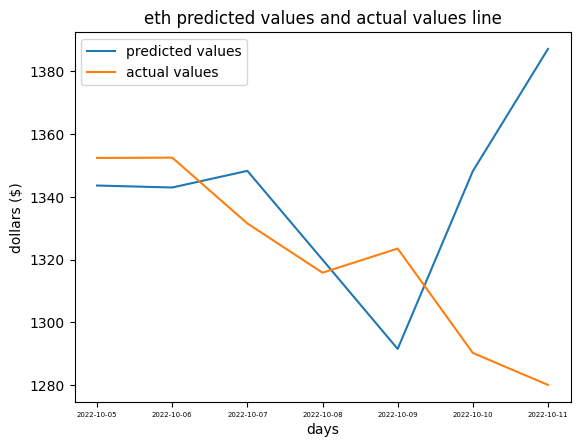

In [53]:
eth_predictions = pd.read_csv('C:/Users/Hamza/PycharmProjects/dissertation_project/stage_3/predictions/eth_7_day_model_prediction.csv')

eth_list = []
eth_percent_error_list = []


for date in dates:
  url = f'https://rest.coinapi.io/v1/ohlcv/BITSTAMP_SPOT_ETH_USD/history?period_id=1DAY&time_start={date}T00:00:00&limit=1'
  response = requests.get(url, headers=headers)
  data = json.loads(response.text)
  print(f'for {date} this is the value returned')
  print("\n")
  print(data)
  print("\n")

  df_json = response.json()
  df = pd.DataFrame.from_dict(df_json)

  actual_price_eth = df['price_close'].values[0]

  eth_list.append(actual_price_eth)

eth_predictions['actual_price_close'] = eth_list

eth_predictions.to_csv(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/eth/eth_7_day_actual.csv', encoding='utf-8', index=False)

new_count = len(eth_predictions)


for i in range(0, new_count):
  print("")
  date = eth_predictions['date'].values[i]
  estimated_value = eth_predictions['predicted_price_close'].values[i]
  actual_value = eth_predictions['actual_price_close'].values[i]
  print("")
  print(f'for {date} the estimated value is {estimated_value} and actual value is {actual_value}')
  print("")
  percent_error = ((estimated_value - actual_value) / actual_value) * 100
  print(f'error between predicted and actual is {percent_error}%')
  eth_percent_error_list.append(percent_error)

eth_predictions['percent_error'] = eth_percent_error_list

eth_predictions.to_csv(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/eth/eth_percent_error.csv', encoding='utf-8', index=False)


plt.plot(dates, eth_percent_error_list, color="red", label = "percent error")
plt.legend()
plt.title("eth percentage error comparing predicted values to actual values")
plt.xticks(fontsize=5)
plt.xlabel('days')
plt.ylabel('percent (%)')
plt.savefig(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/eth/percent_error_line.png')
plt.show()

new_prediction_list = eth_predictions['predicted_price_close'].values
new_actual_list = eth_predictions['actual_price_close'].values

plt.plot(dates, new_prediction_list, label = "predicted values")
plt.plot(dates, new_actual_list, label = "actual values")

plt.legend()
plt.title(f"eth predicted values and actual values line")
plt.xticks(fontsize=5)
plt.xlabel('days')
plt.ylabel('dollars ($)')
plt.savefig(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/eth/predicted_vs_actual.png')
plt.show()




In [37]:
###############################################################################################################################
#                                                            ADA                                                              #
###############################################################################################################################

for 2022-10-05 this is the value returned


[{'time_period_start': '2022-10-05T00:00:00.0000000Z', 'time_period_end': '2022-10-06T00:00:00.0000000Z', 'time_open': '2022-10-05T00:08:49.2550000Z', 'time_close': '2022-10-05T22:09:04.9620000Z', 'price_open': 0.43639, 'price_high': 0.43639, 'price_low': 0.42472, 'price_close': 0.42938, 'volume_traded': 409606.2294195, 'trades_count': 174}]


for 2022-10-06 this is the value returned


[{'time_period_start': '2022-10-06T00:00:00.0000000Z', 'time_period_end': '2022-10-07T00:00:00.0000000Z', 'time_open': '2022-10-06T00:14:22.4870000Z', 'time_close': '2022-10-06T23:38:41.8290000Z', 'price_open': 0.43231, 'price_high': 0.43715, 'price_low': 0.42699, 'price_close': 0.42895, 'volume_traded': 137988.26385607, 'trades_count': 118}]


for 2022-10-07 this is the value returned


[{'time_period_start': '2022-10-07T00:00:00.0000000Z', 'time_period_end': '2022-10-08T00:00:00.0000000Z', 'time_open': '2022-10-07T00:20:24.6240000Z', 'time_close': '2022-10-0

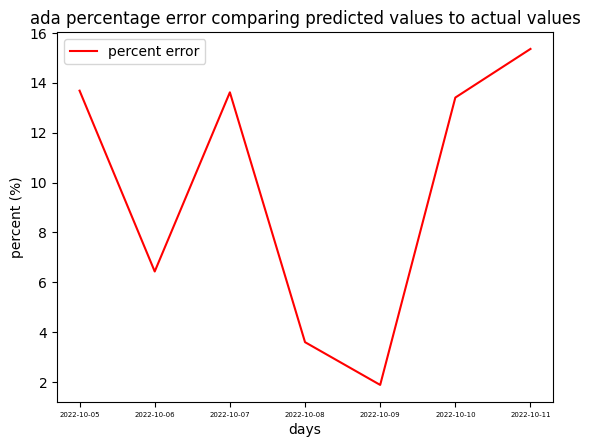

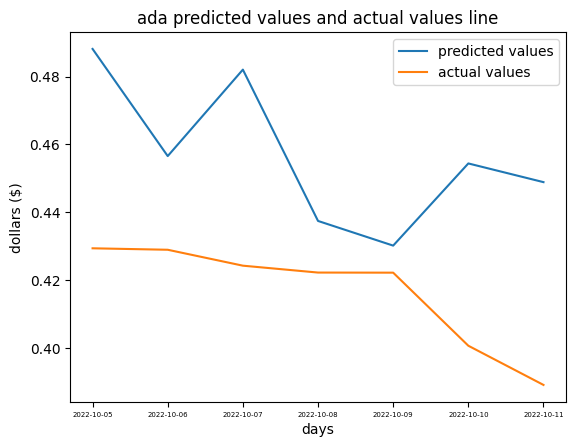

In [54]:
ada_predictions = pd.read_csv('C:/Users/Hamza/PycharmProjects/dissertation_project/stage_3/predictions/ada_7_day_model_prediction.csv')

ada_list = []
ada_percent_error_list = []


for date in dates:
  url = f'https://rest.coinapi.io/v1/ohlcv/BITSTAMP_SPOT_ADA_USD/history?period_id=1DAY&time_start={date}T00:00:00&limit=1'
  response = requests.get(url, headers=headers)
  data = json.loads(response.text)
  print(f'for {date} this is the value returned')
  print("\n")
  print(data)
  print("\n")

  df_json = response.json()
  df = pd.DataFrame.from_dict(df_json)

  actual_price = df['price_close'].values[0]

  ada_list.append(actual_price)

ada_predictions['actual_price_close'] = ada_list

ada_predictions.to_csv(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/ada/ada_7_day_actual.csv', encoding='utf-8', index=False)

new_count = len(ada_predictions)


for i in range(0, new_count):
  print("")
  date = ada_predictions['date'].values[i]
  estimated_value = ada_predictions['predicted_price_close'].values[i]
  actual_value = ada_predictions['actual_price_close'].values[i]
  print("")
  print(f'for {date} the estimated value is {estimated_value} and actual value is {actual_value}')
  print("")
  percent_error = ((estimated_value - actual_value) / actual_value) * 100
  print(f'error between predicted and actual is {percent_error}%')
  ada_percent_error_list.append(percent_error)

ada_predictions['percent_error'] = ada_percent_error_list

ada_predictions.to_csv(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/ada/ada_percent_error.csv', encoding='utf-8', index=False)


plt.plot(dates, ada_percent_error_list, color="red", label = "percent error")
plt.legend()
plt.title("ada percentage error comparing predicted values to actual values")
plt.xticks(fontsize=5)
plt.xlabel('days')
plt.ylabel('percent (%)')
plt.savefig(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/ada/percent_error_line.png')
plt.show()

new_prediction_list = ada_predictions['predicted_price_close'].values
new_actual_list = ada_predictions['actual_price_close'].values

plt.plot(dates, new_prediction_list, label = "predicted values")
plt.plot(dates, new_actual_list, label = "actual values")

plt.legend()
plt.title(f"ada predicted values and actual values line")
plt.xticks(fontsize=5)
plt.xlabel('days')
plt.ylabel('dollars ($)')
plt.savefig(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/ada/predicted_vs_actual.png')
plt.show()



In [37]:
###############################################################################################################################
#                                                            USDT                                                             #
###############################################################################################################################

In [57]:
from matplotlib.ticker import FormatStrFormatter


for 2022-10-05 this is the value returned


[{'time_period_start': '2022-10-05T00:00:00.0000000Z', 'time_period_end': '2022-10-06T00:00:00.0000000Z', 'time_open': '2022-10-05T00:24:15.1930000Z', 'time_close': '2022-10-05T22:14:49.7980000Z', 'price_open': 1.0002, 'price_high': 1.00079, 'price_low': 0.99987, 'price_close': 1.00011, 'volume_traded': 4368296.14451, 'trades_count': 609}]


for 2022-10-06 this is the value returned


[{'time_period_start': '2022-10-06T00:00:00.0000000Z', 'time_period_end': '2022-10-07T00:00:00.0000000Z', 'time_open': '2022-10-06T00:18:56.9810000Z', 'time_close': '2022-10-06T23:44:19.3430000Z', 'price_open': 1.00013, 'price_high': 1.0003, 'price_low': 1.0, 'price_close': 1.00015, 'volume_traded': 2477519.67669, 'trades_count': 474}]


for 2022-10-07 this is the value returned


[{'time_period_start': '2022-10-07T00:00:00.0000000Z', 'time_period_end': '2022-10-08T00:00:00.0000000Z', 'time_open': '2022-10-07T00:14:12.7340000Z', 'time_close': '2022-10-07T23:00:2

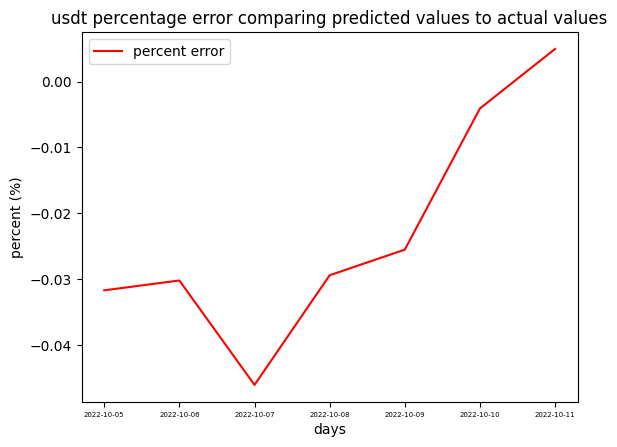

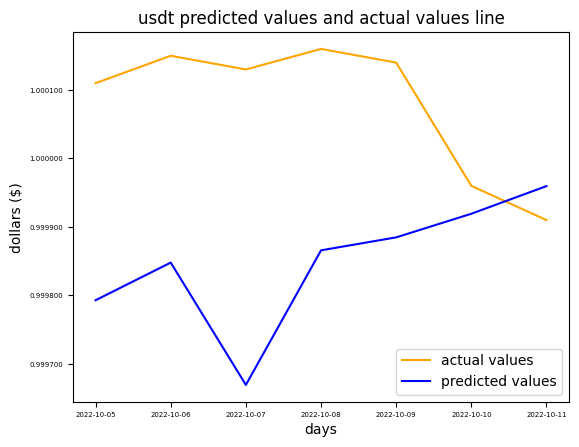

In [60]:
usdt_predictions = pd.read_csv('C:/Users/Hamza/PycharmProjects/dissertation_project/stage_3/predictions/usdt_7_day_model_prediction.csv')

usdt_list = []
usdt_percent_error_list = []


for date in dates:
  url = f'https://rest.coinapi.io/v1/ohlcv/BITSTAMP_SPOT_USDT_USD/history?period_id=1DAY&time_start={date}T00:00:00&limit=1'
  response = requests.get(url, headers=headers)
  data = json.loads(response.text)
  print(f'for {date} this is the value returned')
  print("\n")
  print(data)
  print("\n")

  df_json = response.json()
  df = pd.DataFrame.from_dict(df_json)

  actual_price = df['price_close'].values[0]

  usdt_list.append(actual_price)

usdt_predictions['actual_price_close'] = usdt_list

usdt_predictions.to_csv(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/usdt/usdt_7_day_actual.csv', encoding='utf-8', index=False)

new_count = len(usdt_predictions)


for i in range(0, new_count):
  print("")
  date = usdt_predictions['date'].values[i]
  estimated_value = usdt_predictions['predicted_price_close'].values[i]
  actual_value = usdt_predictions['actual_price_close'].values[i]
  print("")
  print(f'for {date} the estimated value is {estimated_value} and actual value is {actual_value}')
  print("")
  percent_error = ((estimated_value - actual_value) / actual_value) * 100
  print(f'error between predicted and actual is {percent_error}%')
  usdt_percent_error_list.append(percent_error)

usdt_predictions['percent_error'] = usdt_percent_error_list

usdt_predictions.to_csv(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/usdt/usdt_percent_error.csv', encoding='utf-8', index=False)


plt.plot(dates, usdt_percent_error_list, color="red", label = "percent error")
plt.legend()
plt.title("usdt percentage error comparing predicted values to actual values")
plt.xticks(fontsize=5)
plt.xlabel('days')
plt.ylabel('percent (%)')
plt.savefig(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/usdt/percent_error_line.png')
plt.show()

new_prediction_list = usdt_predictions['predicted_price_close'].values
new_actual_list = usdt_predictions['actual_price_close'].values

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
plt.plot(dates, new_actual_list, color="orange", label = "actual values")
plt.plot(dates, new_prediction_list, color='blue', label = "predicted values")

plt.legend()
plt.title(f"usdt predicted values and actual values line")
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)
plt.xlabel('days')
plt.ylabel('dollars ($)')
plt.savefig(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/usdt/predicted_vs_actual.png')
plt.show()
